In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as m
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import missingno as mos
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
from joblib import dump, load

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df=pd.read_csv('C:\\Users\\saroj\\Documents\\machine lerning\\automobile.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\saroj\\Documents\\machine lerning\\automobile.csv'

In [ ]:
df.head()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
df.replace('?',np.nan,inplace=True)

<AxesSubplot: >

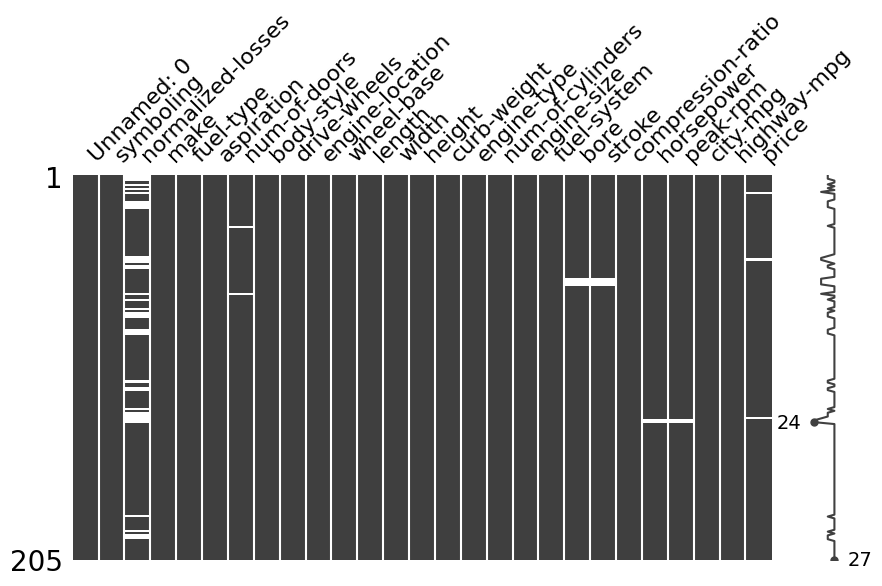

In [ ]:
mos.matrix(df,figsize=(10,5))

In [ ]:
df.columns

Index(['Unnamed: 0', 'symboling', 'normalized-losses', 'make', 'fuel-type',
       'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [ ]:
for col in df:
    print(f'{col:25} {df[col].nunique()},values')

Unnamed: 0                205,values
symboling                 6,values
normalized-losses         51,values
make                      22,values
fuel-type                 2,values
aspiration                2,values
num-of-doors              2,values
body-style                5,values
drive-wheels              3,values
engine-location           2,values
wheel-base                53,values
length                    75,values
width                     44,values
height                    49,values
curb-weight               171,values
engine-type               7,values
num-of-cylinders          7,values
engine-size               44,values
fuel-system               8,values
bore                      38,values
stroke                    36,values
compression-ratio         32,values
horsepower                59,values
peak-rpm                  23,values
city-mpg                  29,values
highway-mpg               30,values
price                     186,values


In [ ]:
num_cols=['normalized-losses','wheel-base','length','width','height','curb-weight','engine-size',
'compression-ratio','bore','stroke','horsepower','peak-rpm','city-mpg', 'highway-mpg']
cat_cols =['symboling','make','fuel-type','aspiration','num-of-doors','body-style','engine-location',
'engine-type','num-of-cylinders','fuel-system','drive-wheels']

In [ ]:
print(len(num_cols))
print(len(cat_cols))

14
11


In [ ]:
df.dropna(subset=['price'],inplace=True)
df['price'] = df['price'].astype(int)

In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
X, y = df.drop('price',axis=1),df['price']

num_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer()),
    ('scaler',StandardScaler())
])

cat_transformer =Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('hot_encoder',OneHotEncoder(drop='first',handle_unknown='ignore'))
])

preprocessor= ColumnTransformer(transformers=[
    ('numerical',num_transformer,num_cols),
    ('categorical',cat_transformer,cat_cols)
])

final pipeline

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector' ,SelectKBest(f_regression,k=25)),
    ('regressor', LinearRegression())
])

In [ ]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X, y,test_size=.2,random_state=42)
model.fit(Xtrain,ytrain)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['normalized-losses',
                                                   'wheel-base', 'length',
                                                   'width', 'height',
                                                   'curb-weight', 'engine-size',
                                                   'compression-ratio', 'bore',
                                                   'stroke', 'horsepower',
                                                   'peak-rpm', 'city-mpg',
                                                   'highway-mpg']),
                                                 ('categorical',
                                                  Pipeline(...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('hot_encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['symboling', 'make',
                                                   'fuel-type', 'aspiration',
                                                   'num-of-doors', 'body-style',
                                                   'engine-location',
                                                   'engine-type',
                                                   'num-of-cylinders',
                                                   'fuel-system',
                                                   'drive-wheels'])])),
                ('selector',
                 SelectKBest(k=25,
                             score_func=<function f_regression at 0x000002ACAD17B250>)),
                ('regressor', LinearRegression())])

In [ ]:
ypred=model.predict(Xtest)
score = m.r2_score(ytest,ypred)
mae = m.mean_absolute_error(ytest,ypred)
mse = m.mean_squared_error(ytest,ypred)
print(f'score : {score:.3f}')
print(f'mae : {mae:.3f}')
print(f'mse : {mse:.3f}')

score : 0.930
mae : 1970.237
mse : 8550648.190


<AxesSubplot: ylabel='Density'>

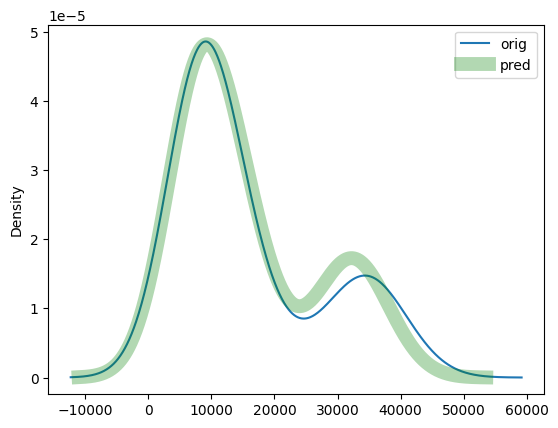

In [ ]:
evaldf = pd.DataFrame([ytest.values,ypred], index=['orig','pred']).T
ax=evaldf.plot(kind='kde',y='orig')
evaldf.plot(kind='kde', y='pred',linewidth=10,alpha=.3,style='g',ax=ax)

In [ ]:
dump(model,'automobile_price_predictionb.jb')

['automobile_price_predictionb.jb']

In [ ]:
model.predict(df)

array([12510.920567  , 12510.920567  , 16802.99008186, 11330.28348958,
       17723.27880893, 15910.63671744, 20269.7440618 , 20522.42224778,
       21747.37194329, 19439.16477078, 19439.16477078, 21681.19553457,
       21807.53462755, 23580.97211071, 27816.13295638, 28747.74912958,
       31395.33287901,  3609.91837059,  5882.69067876,  6734.90946463,
        5973.51046641,  6024.27168917,  8505.0642023 ,  6233.30546121,
        7158.11790448,  7158.11790448,  9524.05669671,  9913.52705251,
       13845.11679028,  6111.06536068,  6791.74150106,  5675.11204596,
        7055.04688874,  7091.80007943,  7742.80621318,  7889.91085903,
        8791.32796804,  8913.0729122 ,  9542.70258068,  7655.98445833,
       10770.17863482, 10804.3602132 ,  8042.67331833, 11258.1168234 ,
       32250.        , 32250.        , 36000.        ,  5714.31193873,
        6151.77955727,  6163.26492936,  6857.38736345,  6709.03905984,
       11665.38082602, 11665.38082602, 11676.86619811, 14344.95564138,
      

In [ ]:
# Xp = preprocessor.fit_transform(X)
# print(Xp)

: 

In [ ]:
# Xtrain,Xtest,ytrain,ytest=train_test_split(Xp,y.values,test_size=.2,random_state=1)

: 

In [ ]:
# selector = SelectKBest(score_func=f_regression,k=10)
# selector.fit(Xtrain,ytrain)

: 

In [ ]:
# selector.get_feature_names_out()

: 

In [ ]:
# result =np.array([[i,v] for i,v in enumerate(selector.scores_)])
# plt.figure(figsize=(15,5))
# plt.bar(result[:,0],result[:,1])
# plt.show()

: 

In [ ]:
# Xtrain_s = selector.transform(Xtrain)
# Xtest_s = selector.transform(Xtest)

: 

In [ ]:
# print(Xtrain_s.shape)
# print(Xtest_s.shape)

: 